<div dir="rtl">
<font size=5>
 بهبود کیفیت تصویر (Super-Resolution) با CNN سفارشی
</font>
</div>

<div dir="rtl">
    <font size="4">
        در این تمرین، شما با یک چالش جذاب در حوزه پردازش تصویر روبرو می‌شوید: <strong>بازسازی یک تصویر با کیفیت بالا (High-Resolution) از یک تصویر با کیفیت پایین (Low-Resolution)</strong>. این وظیفه <strong>Image-to-Image Translation</strong> نامیده می‌شود، جایی که خروجی مدل شما نیز یک تصویر است. شما یک <strong>شبکه CNN سفارشی</strong> را آموزش می‌دهید که بتواند جزئیات از دست رفته را پیش‌بینی کرده و تصویر را "بزرگ‌تر" و "واضح‌تر" کند. این مهارت در افزایش کیفیت تصاویر دوربین‌های امنیتی، پزشکی و تصاویر ماهواره‌ای کاربرد دارد.
        <br><br>
        <h2><strong>توضیح چالش</strong></h2>
        <font size="4">
            برخلاف طبقه‌بندی که در آن خروجی مدل یک برچسب (مانند "جنگل" یا "رودخانه") است، در این تمرین، ورودی و خروجی هر دو تصویر هستند. مدل یاد می‌گیرد که چگونه پیکسل‌های یک تصویر جدید و باکیفیت‌تر را بر اساس الگوی پیکسل‌های تصویر ورودی بی‌کیفیت، تولید کند. این نیازمند طراحی شبکه‌هایی است که بتوانند ابعاد فضایی داده‌ها را افزایش دهند (Upsampling).
        </font>
        <br>
        <h2><strong>وظیفه شما در این تمرین</strong></h2>
        <font size="4">
                <li>✅ <strong>آماده‌سازی داده‌ها:</strong> استفاده از یک دیتاست استاندارد (CIFAR-10) و ایجاد جفت‌های داده (تصویر بی‌کیفیت، تصویر باکیفیت) از طریق کوچک‌نمایی (Downsampling) تصاویر اصلی.</li>
                <li>✅ <strong>ساخت مدل Super-Resolution:</strong> طراحی یک معماری CNN سفارشی که شامل لایه‌هایی برای افزایش ابعاد تصویر مانند <strong><code>Conv2DTranspose</code></strong> یا <strong><code>UpSampling2D</code></strong> باشد.</li>
                <li>✅ <strong>انتخاب تابع هزینه (Loss Function) مناسب:</strong> استفاده از توابعی مانند <code>Mean Squared Error (MSE)</code> یا <code>Mean Absolute Error (MAE)</code> برای مقایسه پیکسل به پیکسل تصویر تولیدشده با تصویر اصلی.</li>
                <li>✅ <strong>آموزش و اعتبارسنجی مدل:</strong> آموزش مدل برای به حداقل رساندن تفاوت بین تصویر بازسازی‌شده و تصویر باکیفیت واقعی.</li>
                <li>✅ <strong>ارزیابی و مصورسازی نتایج:</strong> نمایش سه‌تایی تصاویر (ورودی بی‌کیفیت، خروجی مدل، و هدف باکیفیت) برای ارزیابی بصری عملکرد مدل.</li>
        </font>
    </font>
</div>
<br>
<div dir="rtl">
    <font size="4">
        <h2><strong>دیتاست</strong></h2>
            <li>در این تمرین از دیتاست <strong>CIFAR-10</strong> استفاده می‌کنیم که به صورت پیش‌فرض در Keras موجود است و نیازی به دانلود دستی ندارد.</li>
            <li>این دیتاست شامل <strong>۶۰,۰۰۰ تصویر رنگی</strong> با ابعاد <code>32x32</code> پیکسل است. ما از این تصاویر به عنوان نسخه‌های باکیفیت (High-Resolution) استفاده کرده و خودمان نسخه‌های بی‌کیفیت (Low-Resolution) را تولید خواهیم کرد.</li>
    </font>
</div>

<br>
<div dir="rtl"> <font size=5 color="red">مهم (مطالعه شود): </font>
<div dir="rtl">
    <font size="4">
            این راهنما به شما کمک می‌کند تا مانند یک حرفه‌ای از این منبع ارزشمند استفاده کرده و هرگز با مشکل محدودیت مواجه نشوید.
        <div>
        <br>
            <h3>✅ استراتژی دو مرحله‌ای: گردش کار بهینه</h3>
                قانون اصلی این است: GPU را فقط و فقط برای کاری که واقعاً به آن نیاز دارد، یعنی آموزش نهایی مدل (`model.fit`)، روشن کنید.</strong>
                <li>
                    فاز اول: کدنویسی و آماده‌سازی (در حالت CPU)
                        <li>تمام کدهای خود را در حالت پیش‌فرض (CPU) بنویسید و اجرا کنید.</li>
                        <li>کارهایی مانند دانلود و استخراج دیتاست، پیش‌پردازش، تحلیل آماری، ساخت معماری مدل و حتی اجرای <code>model.summary()</code> به هیچ وجه به GPU نیاز ندارند.</li>
                        <li>با اجرای این مراحل در حالت CPU، شما سهمیه GPU خود را برای کارهای سبک هدر نمی‌دهید.</li>
                </li>
                <br><br>
                <li>
                    فاز دوم: آموزش نهایی (در حالت GPU)
                        <li>وقتی از صحت تمام کدهای خود مطمئن شدید و تنها سلول <code>model.fit()</code> باقی مانده بود، زمان فعال‌سازی GPU است.</li>
                        <li>نوت‌بوک خود را ذخیره کنید (<code>Ctrl+S</code>).</li>
                        <li>از منوی Runtime > Change runtime type شتاب‌دهنده سخت‌افزاری را به GPU تغییر دهید.</li>
                        <li>پس از اتصال مجدد، از منوی Runtime > Run all را انتخاب کنید تا تمام سلول‌ها به سرعت تا قبل از سلول آموزش اجرا شوند.</li>
                        <li>حالا سلول <code>model.fit()</code> را اجرا کرده. </li>
                </li>
        </div>
        <br><br>
        <div>
            <h3>🆘 در صورت مواجهه با محدودیت ها:</h3>
                اگر پیامی مبنی بر اتمام سهمیه GPU دریافت کردید،. این اتفاق معمولاً پس از چند ساعت یا یک روز برطرف می‌شود. اما اگر عجله دارید، دو راه حل وجود دارد:
                <li>
                    راه حل سریع: می‌توانید از یک حساب کاربری گوگل دیگر برای باز کردن نوت‌بوک خود استفاده کنید. هر حساب کاربری سهمیه جداگانه‌ای دارد.
                </li>
                <li>
                    راه حل پیشنهادی و حرفه‌ای‌تر: از نوت‌بوک‌های Kaggle استفاده کنید.
                </li>
            </div>
    </font>
</div>
<br><br>

<br><br>
<div dir="rtl"> <font size="5">1. کتابخانه های مورد نیاز را لود کنید</font> </div>
<br>


In [1]:
# TODO: کتابخانه های مورد نیاز را ایمپورت کنید

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input,Conv2D,Conv2DTranspose
from keras.models import Sequential

<br><br>
<div dir="rtl"> <font size="5">2. بارگذاری و آماده‌سازی دیتاست</font> </div>
<br>
<div dir="rtl">
    <font size=4>
        در این بخش، دیتاست CIFAR-10 را بارگذاری کرده و آن را برای مسئله Super-Resolution آماده می‌کنیم.
        <br><br>
        <strong>مراحل:</strong>
        <li>1. بارگذاری دیتاست CIFAR-10.  ما فقط به تصاویر (x_train, x_test) نیاز داریم و برچسب‌ها (y_train, y_test) در این تمرین کاربردی ندارند.</li>
        <li>2. نرمال‌سازی مقادیر پیکسل‌ها به بازه <code>[0, 1]</code>. این کار به پایداری آموزش مدل کمک می‌کند.</li>
        <li>3. دیتاست Cifar10 را از طریق Tensorflow در پروژه لود کنید.</li>
    </font>
</div>

In [2]:
# TODO: دیتاست CIFAR-10 را بارگذاری کنید.

from tensorflow.keras.datasets import cifar10

(x_train,y_train),(x_test,y_test)=cifar10.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(type(x_train))
print(type(y_train))


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


<br>
<div dir="rtl">
    <font size=4>
        مقادیر پیکسل‌ها را به نوع float32 تبدیل کرده و در بازه [0, 1] نرمال‌سازی کنید.
    </font>
</div>

In [3]:
# TODO: مقادیر پیکسل‌ها را به نوع float32 تبدیل کرده و در بازه [0, 1] نرمال‌سازی کنید.


x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

<br />
<div dir="rtl">
  <font size="4">
    در این بخش، ابعاد تصاویر با کیفیت بالا (<strong>High Resolution - HR</strong
    >) و تصاویر با کیفیت پایین (<strong>Low Resolution - LR</strong>) مشخص
    می‌شوند. تصاویر اصلی دارای ابعاد <strong>32×32</strong> هستند، اما برای
    شبیه‌سازی نسخه‌ی کم‌کیفیت، همان تصاویر را به ابعاد
    <strong>16×16</strong> کاهش می‌دهیم. این کار به مدل کمک می‌کند تا یاد بگیرد
    چگونه از تصاویر کوچک‌تر و بی‌جزئیات، نسخه‌های واضح‌تر و دقیق‌تری بازسازی
    کند.
  </font>
</div>


In [4]:
# TODO: تعریف ابعاد تصاویر با کیفیت (HR) و بی کیفیت (LR)

HR_shape=(32,32,3)
LR_shape=(16,16,3)

<br><br>
<div dir="rtl"> <font size="5">۳. تولید جفت داده‌های بی‌کیفیت و باکیفیت</font> </div>
<br>
<div dir="rtl">
    <font size="4">
        مدل ما باید یاد بگیرد که چگونه از یک تصویر بی‌کیفیت (Low Resolution (LR))، یک تصویر باکیفیت (High Resolution (HR)) بسازد. برای این کار، باید داده‌های آموزشی را به صورت جفت‌های (LR, HR) آماده کنیم.
        <br><br>
        <strong>وظیفه:</strong>
        <li>با استفاده از تابع <code>tf.image</code>، تصاویر باکیفیت  را به ابعاد نصف (مثلاً از 32x32 به 16x16) کوچک کنید تا نسخه‌های بی‌کیفیت (LR) آن‌ها ساخته شود.</li>
        <li>این تصاویر LR به عنوان ورودی مدل و تصاویر HR به عنوان خروجی هدف (target) استفاده خواهند شد.</li>
    </font>
</div><br>

In [5]:
# TODO: تصاویر بی‌کیفیت (LR) را با کوچک کردن تصاویر باکیفیت (HR) بسازید.


x_train_resized=tf.image.resize(x_train,(16,16))
x_test_resized=tf.image.resize(x_test,(16,16))

<br><br>
<div dir="rtl"> <font size="5">4. مصورسازی داده ها</font> </div>
<div dir="rtl">
    <font size="4">
        برای درک بهتر داده‌ها، یک نمونه از تصاویر بی‌کیفیت (ورودی مدل) و باکیفیت (خروجی مطلوب) را در کنار هم نمایش دهید.
    </font>
</div><br>

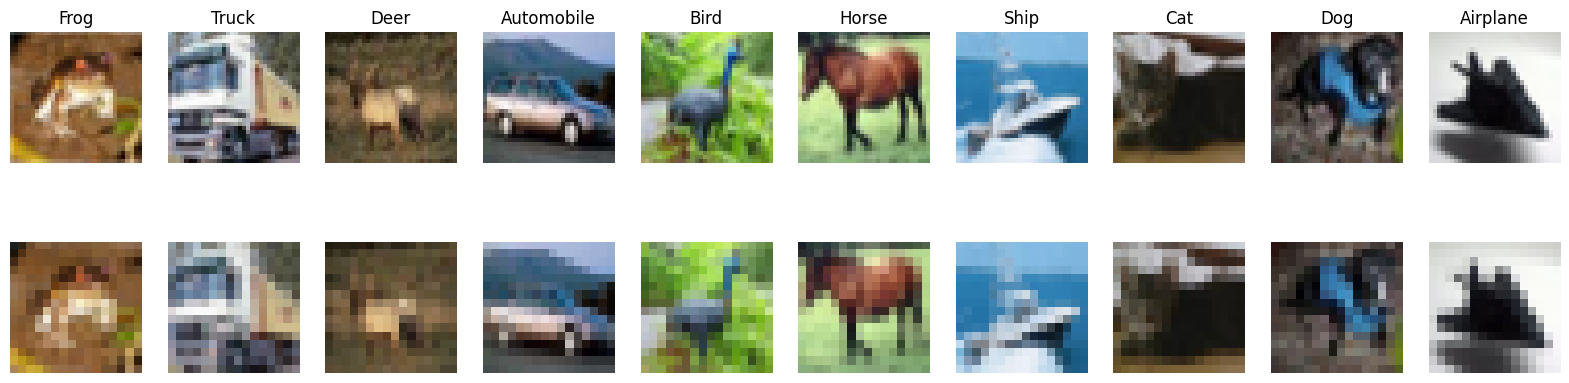

[np.uint8(6), np.uint8(9), np.uint8(4), np.uint8(1), np.uint8(2), np.uint8(7), np.uint8(8), np.uint8(3), np.uint8(5), np.uint8(0)]


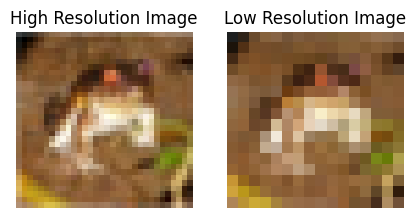

In [6]:
# TODO: یک تابع برای نمایش یک تصویر LR و HR در کنار هم بنویسید.

class_names=['Airplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Truck']
class_labels=[]
HR_unique_images=[]
LR_unique_images=[]
for i in range(50):
    if y_train[i][0] not in class_labels:
        class_labels.append(y_train[i][0])
        HR_unique_images.append(x_train[i])
        LR_unique_images.append(x_train_resized[i])

plt.figure(figsize=(20,5))
for i in range(10):
    plt.subplot(2,10,i+1)
    plt.imshow(HR_unique_images[i])
    plt.title(class_names[class_labels[i]])
    plt.axis('off')
    plt.subplot(2,10,i+11)
    plt.imshow(LR_unique_images[i])
    plt.axis('off')
plt.show()

print(class_labels)

def show_Image(HR_image,LR_image):
    plt.figure(figsize=(5,10))
    plt.subplot(1,2,1)
    plt.imshow(HR_image)
    plt.title('High Resolution Image')
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.imshow(LR_image)
    plt.title('Low Resolution Image')
    plt.axis('off')
    plt.show()

# TODO: نمایش یک نمونه از داده‌های آموزشی

show_Image(x_train[0],x_train_resized[0])

<br /><br />

<div dir="rtl"><font size="5">5. ساخت معماری مدل Super-Resolution</font></div>
<br />
<div dir="rtl">
  <font size="4">
      در این بخش، معماری مدل CNN را برای وظیفه <strong>Super-Resolution</strong> طراحی می‌کنیم.
      این مدل یک تصویر <strong>LR</strong> را به‌عنوان ورودی گرفته و یک تصویر با وضوح بالاتر <strong>(HR)</strong> به‌عنوان خروجی تولید می‌کند.
      <br /><br />
      <strong>نکات کلیدی معماری:</strong>
      <li><strong>لایه ورودی:</strong> ابعاد آن باید متناسب با اندازه‌ی تصاویر LR باشد.</li>
      <li><strong>لایه‌های استخراج ویژگی:</strong> شامل چندین لایه <code>Conv2D</code> برای یادگیری الگوها و بافت‌های موجود در تصویر.</li>
      <li><strong>لایه افزایش ابعاد (Upsampling):</strong> از لایه <code>Conv2DTranspose</code> برای افزایش ابعاد فضایی نقشه ویژگی استفاده می‌شود.
        این لایه می‌تواند مثلاً یک نقشه 16×16 را به 32×32 تبدیل کند.</li>
      <li><strong>لایه خروجی:</strong> یک لایه <code>Conv2D</code> با 3 فیلتر (برای کانال‌های R، G و B) و تابع فعال‌سازی <code>sigmoid</code>
        که تضمین می‌کند مقادیر پیکسل‌ها در بازه [0, 1] باقی بمانند.</li>
      <br /><br />
      هدف از طراحی مدل <strong>Super-Resolution</strong> بازسازی تصاویر با وضوح بالا از نمونه‌های کم‌کیفیت است.
      شبکه عصبی در این فرایند یاد می‌گیرد جزئیات از دست‌رفته در هنگام کاهش کیفیت را بازیابی کند.
      <br /><br />
      این هدف معمولاً با استفاده از معماری‌هایی مانند <strong>SRCNN</strong>، <strong>VDSR / EDSR</strong> و <strong>FSRCNN</strong> انجام می‌شود
      که از شبکه‌های کانولوشنی برای استخراج ویژگی‌ها و از روش‌هایی مثل <em>Residual Learning</em> برای بهبود کیفیت نهایی استفاده می‌کنند.
      <br /><br />
      با این حال، از آن‌جا که در این مرحله هنوز مفاهیم <strong>Residual Connection</strong> و <strong>GAN</strong> آموزش داده نشده‌اند،
      از یک مدل ساده‌تر استفاده می‌کنیم تا مفهوم پایه‌ای Super-Resolution بهتر درک شود.
      در این مدل، ابتدا تصویر ورودی با استفاده از لایه <code>UpSampling2D</code> یا <code>Conv2DTranspose</code> بزرگ‌نمایی می‌شود
      و سپس چندین لایه <code>Conv2D</code> برای بازسازی الگوها و بافت‌های ظریف اضافه می‌گردند.
      در نهایت، لایه‌ی خروجی با تابع فعال‌سازی <code>sigmoid</code> مقادیر پیکسل‌ها را در محدوده‌ی [0, 1] حفظ می‌کند.
      <br /><br />
      این معماری ساده اما مؤثر، مقدمه‌ای مناسب برای درک مدل‌های پیشرفته‌تر Super-Resolution است.
      <br><br>
      <font color="red">راهنمایی</font>:  استفاده هم زمان از هر دو لایه الزامی نیست. شما میتوانید از یکی از این لایه ها استفاده کنید. هرچند که در معماری ها و تسک های پیچیده تر, ممکن است از هر دو لایه استفاده شود.
  </font>
</div>
<br>


<div dir="rtl"> <font size="4">برای مطالعه در خصوص لایه های UpSampling2D و Conv2DTranspose به لینک های زیر مراجعه کنید.</font> </div>

* Basic Resouces:
  * [Conv2DTranspose | Tensorflow](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2DTranspose)
  * [UpSampling2D | Tensorflow](https://www.tensorflow.org/api_docs/python/tf/keras/layers/UpSampling2D)

* Advanced Resources:
  * [Deconvolution and Checkerboard Artifacts](https://distill.pub/2016/deconv-checkerboard/)
  * [Understanding Transposed Convolution](https://towardsdatascience.com/transposed-convolution-demystified-84ca81b4baba/)

  <br><br>

In [7]:
# TODO: ایجاد تابع Super Resolution


def create_super_resolution_model():
  model=Sequential([
      Input(shape=(16,16,3)),
      Conv2D(filters=8,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
      Conv2D(16,(2,2),(1,1),padding='same',activation='relu'),
      Conv2D(32,(2,2),(1,1),padding='same',activation='relu'),
      Conv2DTranspose(3,(2,2),(2,2),padding='same',activation='relu'),
      Conv2D(3,(2,2),(1,1),padding='same',activation='sigmoid')
  ])

  model.compile(optimizer='adam',loss='mse',metrics=['mse','mae'])
  return model


In [8]:
# TODO: ساخت مدل
model=create_super_resolution_model()


# TODO: نمایش خلاصه معماری مدل
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 16, 16, 8)      │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 16)     │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 32)     │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 32, 32, 3)      │           387 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 3)      │            39 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,258 (12.73 KB)

 Trainable params: 3,258 (12.73 KB)

 Non-trainable params: 0 (0.00 B)

<br><br>
<div dir="rtl"> <font size="5">6. آموزش مدل</font> </div>
<div dir="rtl">
    <font size="4">
        حالا مدل را با استفاده از داده‌های آماده‌شده آموزش می‌دهیم. در صورت نیاز از Callback ها استفاده کنید.
        <br><br>
        <strong>نکته مهم:</strong>
        <li>ورودی مدل (x) تصاویر بی‌کیفیت  هستند.</li>
        <li>خروجی هدف (y) تصاویر باکیفیت  هستند.</li>
        <li>مدل یاد می‌گیرد که تابع هزینه‌ بین خروجی پیش‌بینی‌شده و خروجی واقعی را به حداقل برساند.</li>
    </font>
</div>

In [9]:
# TODO: در صورت نیاز توابع Callbacks را پیاده سازی کنید.

# TODO: پیاده سازی ModelCheckpoint
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

model_checkpoint = ModelCheckpoint(
    filepath="best_model.keras",           # مسیر ذخیره‌سازی مدل
    monitor="val_loss",                 # معیاری که بر اساس آن بهترین مدل ذخیره شود
    save_best_only=True,                # فقط بهترین مدل ذخیره شود
    save_weights_only=False,            # اگر True باشد فقط وزن‌ها ذخیره می‌شوند
    mode="min",                         # چون val_loss را کمینه می‌کنیم
    verbose=1                           # برای نمایش پیام ذخیره‌سازی
)

# TODO: پیاده سازی EarlyStopping
early_stopping=EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1,
    mode='min'
)

# TODO: پیاده سازی ReduceLROnPlateau
from tensorflow.keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(
    monitor="val_loss",      # معیاری که زیر نظر گرفته می‌شود
    factor=0.1,              # ضریب کاهش LR (مثلاً 0.1 یعنی LR * 0.1)
    patience=5,              # اگر بعد از 5 اپوک بهبودی رخ نداد، LR کاهش یابد
    verbose=1,               # پیام تغییر LR چاپ شود
    mode="min",              # چون val_loss هرچه کمتر بهتر است
    min_lr=1e-6              # حداقل LR که می‌تواند کاهش یابد
)

# تعریف لیستی از Callbacks
callbacks_list = [model_checkpoint, early_stopping, reduce_lr]


In [10]:
# TODO: مدل را آموزش دهید.
# از داده های آموزشی برای آموزش مدل و از داده های آزمایش برای اعتبار سنجی استفاده کنید.

history = model.fit(
    x_train_resized, x_train,
    epochs=50,
    batch_size=16,
    validation_data=(x_test_resized, x_test),
    callbacks=callbacks_list
)

Epoch 1/50
3123/3125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0151 - mae: 0.0824 - mse: 0.0151
Epoch 1: val_loss improved from inf to 0.00305, saving model to best_model.keras
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - loss: 0.0151 - mae: 0.0824 - mse: 0.0151 - val_loss: 0.0030 - val_mae: 0.0393 - val_mse: 0.0030 - learning_rate: 0.0010
Epoch 2/50
3109/3125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0030 - mae: 0.0386 - mse: 0.0030
Epoch 2: val_loss improved from 0.00305 to 0.00279, saving model to best_model.keras
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.0030 - mae: 0.0386 - mse: 0.0030 - val_loss: 0.0028 - val_mae: 0.0373 - val_mse: 0.0028 - learning_rate: 0.0010
Epoch 3/50
3111/3125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0028 - mae: 0.0369 - mse: 0.0028
Epoch 3: val_loss improved from 0.00279 to 0.00266, saving model to best_model.keras
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 0.0028 - mae: 0.0369 - mse: 0.0028 - val_loss: 0.0027 - val_mae: 0.0359 - 

<br><br>
<div dir="rtl"> <font size="5">۷. ترسیم نمودار تابع هزینه (Loss)</font> </div>
<div dir="rtl">
    <font size="4">
        نمودار تابع هزینه را برای داده‌های آموزشی و اعتبارسنجی رسم کنید تا روند یادگیری مدل را بررسی کنیم.
    </font>
</div>

In [11]:
# TODO: نمودار Loss را برای داده‌های آموزشی و اعتبارسنجی رسم کنید.
def plot_loss_history(history):
    """
    نمودار Loss را برای داده‌های آموزشی و اعتبارسنجی رسم می‌کند.

    Args:
        history: شی History برگردانده شده توسط متد model.fit.
    """
    train_losses=history.history['loss']
    val_losses=history.history['val_loss']
    train_mae=history.history['mae']
    val_mae=history.history['val_mae']
    plt.figure(figsize=(14,8))

    plt.subplot(1,2,1)
    plt.plot(train_losses,label='Training Loss')
    plt.plot(val_losses,label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(train_mae,label='Training MAE')
    plt.plot(val_mae,label='Validation MAE')
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.title('Training and Validation MAE')
    plt.legend()

    plt.tight_layout()
    plt.show()



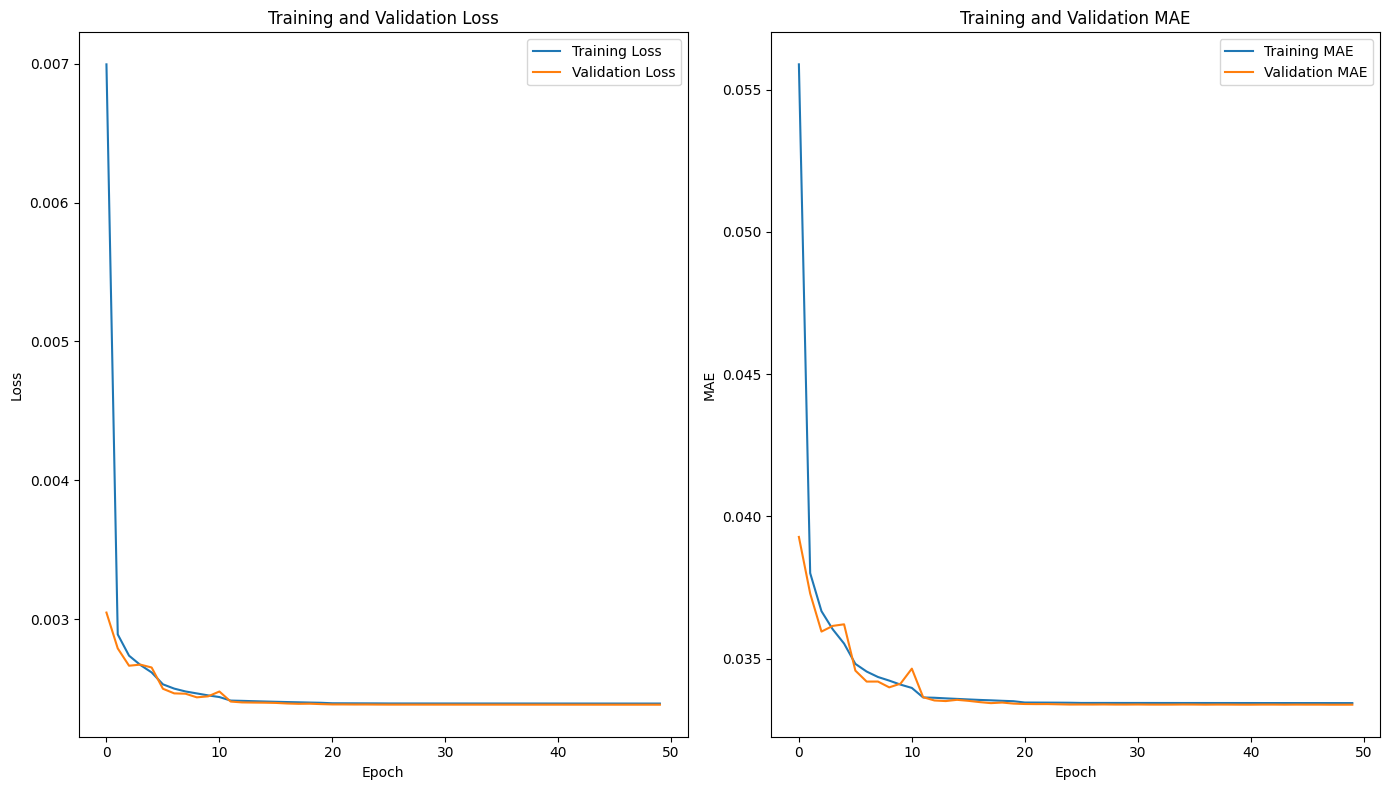

In [12]:
plot_loss_history(history=history)

<br /><br />
<div dir="rtl"><font size="5">8. ارزیابی نهایی و مصورسازی نتایج</font></div>
<br />
<div dir="rtl">
  <font size="4">
    در این بخش، عملکرد مدل Super-Resolution را به صورت بصری ارزیابی می‌کنید.
    هدف این است که به چشم ببینیم مدل چقدر در بازسازی جزئیات موفق بوده است.
    <br /><br />
    <strong>وظیفه شما:</strong>
    <li>
      مدل آموزش‌دیده را برای پیش‌بینی روی چند نمونه تصادفی از داده‌های
      تست به کار ببرید.
    </li>
    <li>
      سپس برای هر نمونه، سه تصویر را در کنار هم نمایش دهید:
        <li>
          تصویر ورودی با کیفیت پایین (Low-Resolution - LR): تصویری که مدل به
          عنوان ورودی دریافت کرده است.
        </li>
        <li>
          تصویر بازسازی‌شده توسط مدل (Super-Res (Predicted)): تصویری که مدل
          شما با کیفیت بالا پیش‌بینی کرده است.
        </li>
        <li>
          تصویر واقعی و با کیفیت بالا (Ground Truth HR): تصویر اصلی که مدل
          باید آن را بازسازی می‌کرد (هدف مدل).
        </li>
    </li>
    با مقایسه این سه تصویر، می‌توانید کیفیت بصری بازسازی مدل و توانایی آن در
    افزودن جزئیات را ارزیابی کنید.
  </font>
</div>


In [13]:
# TODO: با استفاده از مدل آموزش‌دیده، تصاویر باکیفیت را از روی تصاویر بی‌کیفیت تست پیش‌بینی کنید.

x_test_pred=model.predict(x_test_resized)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


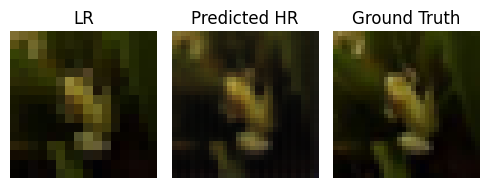

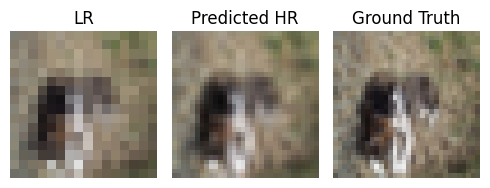

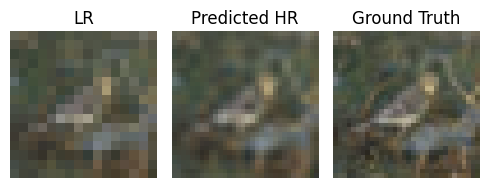

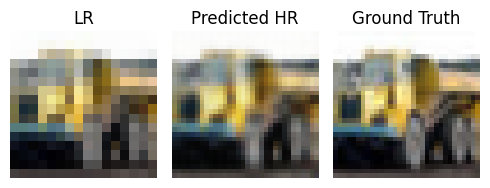

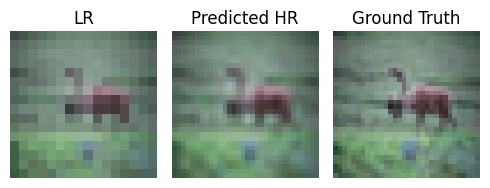

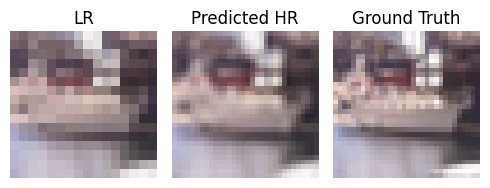

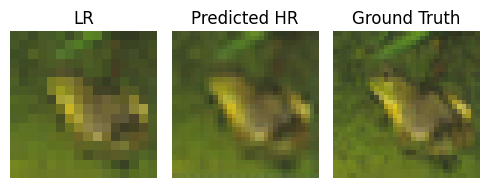

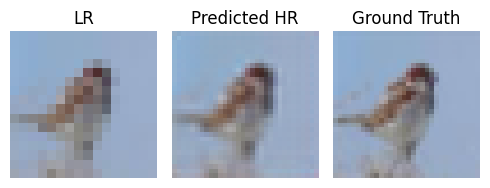

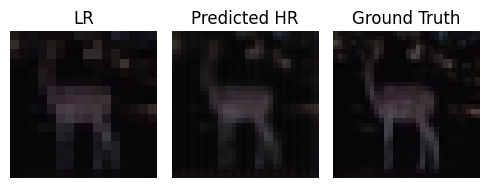

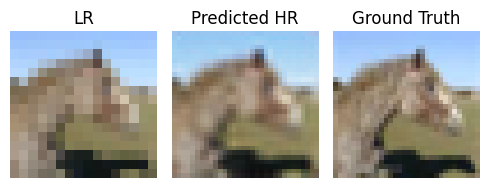

In [14]:
# TODO: یک تابع برای نمایش سه‌تایی تصاویر بنویسید.

def compare_Image(LR_image,HR_image,HR_pred_image):
  plt.figure(figsize=(5,15))
  plt.subplot(1,3,1)
  plt.imshow(LR_image)
  plt.axis('off')
  plt.title('LR')

  plt.subplot(1,3,2)
  plt.imshow(HR_pred_image)
  plt.axis('off')
  plt.title('Predicted HR')

  plt.subplot(1,3,3)
  plt.imshow(HR_image)
  plt.axis('off')
  plt.title('Ground Truth')

  plt.tight_layout()
  plt.show()

random_indexes=np.random.randint(0,len(x_test),10)
for index in random_indexes:
  compare_Image(x_test_resized[index],x_test[index],x_test_pred[index])


<br /><br />
<div dir="rtl">
  <font size="4">
    <div dir="rtl">
      <font size="5">9. ارزیابی کمی با استفاده از معیار PSNR </font>
    </div>
  </font>
  <font size="4">
      <strong>Peak Signal-to-Noise Ratio (PSNR)</strong> یک معیار مهندسی برای سنجش
      کیفیت بازسازی تصاویر است که میزان نزدیکی تصویر بازسازی‌شده (مثلاً خروجی مدل
      Super-Resolution) به تصویر اصلی را اندازه‌گیری می‌کند. این معیار بر پایه‌ی
      خطای میانگین مربعی (MSE) تعریف می‌شود و واحد آن دسی‌بل (dB) است. هر چه مقدار
      PSNR بیشتر باشد، نویز کمتر و کیفیت بازسازی بهتر است. <br /><br />
      به طور معمول، مقدار PSNR بالاتر از ۳۰ دسی‌بل نشان‌دهنده‌ی کیفیت خوب در
      بازسازی تصاویر طبیعی است، در حالی‌که مقادیر پایین‌تر بیانگر وجود نویز یا از
      دست‌رفتن جزئیات در تصویر هستند.
      <br /><br />
      از آن‌جا که معماری طراحی‌شده در این تمرین یک مدل ساده و آموزشی است، انتظار
      مقدار PSNR بالا وجود ندارد. هدف اصلی، آشنایی با مفاهیم پایه‌ای وظیفه‌ی
      <strong>Super-Resolution</strong> و نحوه‌ی ارزیابی آن است.
      <br><br>
      <font color='red'>هدف:</font> سعنی کنید معیاری PSNR را بین 20 تا 30 به دست آورید.
      <br>
      <br>برای مطالعه بیشتر در مورد این معیار به لینک های زیر مراجعه کنید.
  </font>
</div>

* [Peak Signal-to-Noise Ratio](https://en.wikipedia.org/wiki/Peak_signal-to-noise_ratio)
* [Tensorflow | PSNR](https://www.tensorflow.org/api_docs/python/tf/image/psnr)
<br>

In [15]:
# TODO: محاسبه PSNR برای کل مجموعه تست
# استفاده از تابع psnr از TensorFlow برای محاسبه Peak Signal-to-Noise Ratio (PSNR)

batch_psnr=tf.image.psnr(x_test_pred,x_test,max_val=1.0)
print(batch_psnr)

tf.Tensor([24.7307   26.270855 27.639135 ... 29.482576 26.064747 25.864155], shape=(10000,), dtype=float32)


In [16]:
average_psnr=tf.reduce_mean(batch_psnr)
print(f'Average PSNR : {average_psnr:.3f}')

Average PSNR : 26.914
